In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [23]:
df=pd.read_csv("C:/Users/Rahul Gupta/Documents/Dataset/football_data.csv",index_col=0)
df.head()

ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     Club Logo    Value  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  €110.5M   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png     €77M   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  €118.5M   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png     €72M   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png    €102M   

    Wage  Special Preferred Foot  International Reputation  Weak Foot  \
0  €565K     2202           Left                       5.0        4.0   
1  €405K     2228          Right                       5.0        4.0   
2  €290K     2143          Right                       5.0        5.0   
3  €260K     1471          Right                       4.0        3.0   
4  €355K     2281          Right                       4.0        5.0   

   Skill Moves       Work Rate   Body Type Real Face Position  Jersey Number  \
0          4.0  Medium/ Medium       Messi       Yes       RF           10.0   
1          5.0       High/ Low  C. Ronaldo       Yes       ST            7.0   
2          5.0    High/ Medium      Neymar       Yes       LW           10.0   
3          1.0  Medium/ Medium        Lean       Yes       GK            1.0   
4          4.0      High/ High      Normal       Yes      RCM            7.0   

         Joined Loaned From Contract Valid Until Height  Weight    LS    ST  \
0   Jul 1, 2004         NaN                 2021    5'7  159lbs  88+2  88+2   
1  Jul 10, 2018         NaN                 2022    6'2  183lbs  91+3  91+3   
2   Aug 3, 2017         NaN                 2022    5'9  150lbs  84+3  84+3   
3   Jul 1, 2011         NaN                 2020    6'4  168lbs   NaN   NaN   
4  Aug 30, 2015         NaN                 2023   5'11  154lbs  82+3  82+3   

     RS    LW    LF    CF    RF    RW   LAM   CAM   RAM    LM   LCM    CM  \
0  88+2  92+2  93+2  93+2  93+2  92+2  93+2  93+2  93+2  91+2  84+2  84+2   
1  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3   
2  84+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  88+3  81+3  81+3   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  82+3  87+3  87+3  87+3  87+3  87+3  88+3  88+3  88+3  88+3  87+3  87+3   

    RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB  \
0  84+2  91+2  64+2  61+2  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2   
1  81+3  88+3  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3   
2  81+3  88+3  65+3  60+3  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  87+3  88+3  77+3  77+3  77+3  77+3  77+3  73+3  66+3  66+3  66+3  73+3   

   Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0      84.0       95.0             70.0          90.0     86.0       97.0   
1      84.0       94.0             89.0          81.0     

In [24]:
df.shape

(18207, 88)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [26]:
pd.set_option('display.max_rows',500)  
df.isna().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST                           2085
RS            

In [27]:
data=df.copy()

# Data Cleaning

Some of the columns in the dataset are irrelevent hence we may drop them

In [28]:
data=data.drop(columns=['ID','Photo','Flag','Club Logo','Loaned From','Real Face','Release Clause'],axis=1)
data.shape

(18207, 81)

In [29]:
data.dropna(axis=0, inplace = True)
data.shape

(14751, 81)

In [30]:
data.isna().sum()

Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Jersey Number               0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
LS                          0
ST                          0
RS                          0
LW                          0
LF                          0
CF                          0
RF                          0
RW                          0
LAM                         0
CAM                         0
RAM                         0
LM                          0
LCM       

In [31]:
#Number of duplicate rows
data.duplicated().sum()

0

In [32]:
#Cleaning the value and wage columns
def manipulate_mk(Value):
    if isinstance(Value,str):
        rep = Value.replace('€', '')
        if 'M' in rep:
            rep = float(rep.replace('M', ''))*1000000
        elif 'K' in Value:
            rep = float(rep.replace('K', ''))*1000
        return float(rep)

data['Value']=data['Value'].apply(lambda x:manipulate_mk(x))
data['Wage']=data['Wage'].apply(lambda x:manipulate_mk(x))

In [33]:
#Cleaning and Preprocessing the 'Joined' Column
data['Joined']=pd.to_datetime(data['Joined'])
data['Joined']=pd.DatetimeIndex(data['Joined']).year
data['Joined']=data['Joined'].replace(np.nan,0)
data['Joined']=data['Joined'].astype(str)

In [34]:
#Cleaning and Preprocessing the 'Contract Valid Until' Column
data['Contract Valid Until']=pd.to_datetime(data['Contract Valid Until'])
data['Contract Valid Until']=pd.DatetimeIndex(data['Contract Valid Until']).year
data['Contract Valid Until']=data['Contract Valid Until'].replace(np.nan,0)
data['Contract Valid Until']=data['Contract Valid Until'].astype(str)

In [35]:
#Cleaning and Preprocessing the 'Height' Column
def clean_height(val):
    obs=[]
    value=[]
    if isinstance(val,str):
        obs=val.split("'")
        a=obs[0]
        b=obs[1]
        value=(int(a)*12+int(b))/12
    return(value)
data['Height']=data['Height'].apply(clean_height)

In [36]:
#Cleaning and Preprocessing the 'Weight' Column
def clean_weight(val):
    obs=[]
    if isinstance(val,str):
        obs=int(val.replace('lbs',''))
    return(obs)

data['Weight']=data['Weight'].apply(lambda x:clean_weight(x))
data['Weight']=data['Weight'].astype(float)

In [37]:
#Cleaning columns like 'LS','ST','RS',etc.
def remove_plus(val):
    value=[]
    if isinstance(val,str):
        obs=val.split('+') 
        a=obs[0]
        b=obs[1]
        value=int(a)+int(b)
    return(value)

col=['LS', 'ST', 'RS','LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM','RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB','RCB', 'RB']
for i in col:
    data[i]=data[i].apply(remove_plus)
    data[i]=data[i].astype(float)

In [38]:
pd.set_option('display.max_columns',500) 
data.head()

Name  Age Nationality  Overall  Potential  \
0           L. Messi   31   Argentina       94         94   
1  Cristiano Ronaldo   33    Portugal       94         94   
2          Neymar Jr   26      Brazil       92         93   
4       K. De Bruyne   27     Belgium       91         92   
5          E. Hazard   27     Belgium       91         91   

                  Club        Value      Wage  Special Preferred Foot  \
0         FC Barcelona  110500000.0  565000.0     2202           Left   
1             Juventus   77000000.0  405000.0     2228          Right   
2  Paris Saint-Germain  118500000.0  290000.0     2143          Right   
4      Manchester City  102000000.0  355000.0     2281          Right   
5              Chelsea   93000000.0  340000.0     2142          Right   

   International Reputation  Weak Foot  Skill Moves       Work Rate  \
0                       5.0        4.0          4.0  Medium/ Medium   
1                       5.0        4.0          5.0       High/ Low   
2                       5.0        5.0          5.0    High/ Medium   
4                       4.0        5.0          4.0      High/ High   
5                       4.0        4.0          4.0    High/ Medium   

    Body Type Position  Jersey Number Joined Contract Valid Until    Height  \
0       Messi       RF           10.0   2004                 2021  5.583333   
1  C. Ronaldo       ST            7.0   2018                 2022  6.166667   
2      Neymar       LW           10.0   2017                 2022  5.750000   
4      Normal      RCM            7.0   2015                 2023  5.916667   
5      Normal       LF           10.0   2012                 2020  5.666667   

   Weight    LS    ST    RS    LW    LF    CF    RF    RW   LAM   CAM   RAM  \
0   159.0  90.0  90.0  90.0  94.0  95.0  95.0  95.0  94.0  95.0  95.0  95.0   
1   183.0  94.0  94.0  94.0  92.0  93.0  93.0  93.0  92.0  91.0  91.0  91.0   
2   150.0  87.0  87.0  87.0  92.0  92.0  92.0  92.0  92.0  92.0  92.0  92.0   
4   154.0  85.0  85.0  85.0  90.0  90.0  90.0  90.0  90.0  91.0  91.0  91.0   
5   163.0  86.0  86.0  86.0  92.0  91.0  91.0  91.0  92.0  92.0  92.0  92.0   

     LM   LCM    CM   RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB  \
0  93.0  86.0  86.0  86.0  93.0  66.0  63.0  63.0  63.0  66.0  61.0  49.0   
1  91.0  84.0  84.0  84.0  91.0  68.0  64.0  64.0  64.0  68.0  64.0  56.0   
2  91.0  84.0  84.0  84.0  91.0  68.0  63.0  63.0  63.0  68.0  63.0  50.0   
4  91.0  90.0  90.0  90.0  91.0  80.0  80.0  80.0  80.0  80.0  76.0  69.0   
5  92.0  85.0  85.0  85.0  92.0  69.0  66.0  66.0  66.0  69.0  63.0  52.0   

     CB   RCB    RB  Crossing  Finishing  HeadingAccuracy  ShortPassing  \
0  49.0  49.0  61.0      84.0       95.0             70.0          90.0   
1  56.0  56.0  64.0      84.0       94.0             89.0          81.0   
2  50.0  50.0  63.0      79.0       87.0             62.0          84.0   
4  69.0  69.0  76.0      93.0       82.0             55.0          92.0   
5  52.0  52.0  63.0      81.0       84.0             61.0          89.0   

   Volleys  Dribbling  Curve  FKAccuracy  LongPassing  BallControl  \
0     86.0       97.0   93.0        94.0         87.0         96.0   
1     87.0       88.0   81.0        76.0         77.0         94.0   
2     84.0       96.0   88.0        87.0         78.0         95.0   
4     82.0       86.0   85.0        83.0         91.0         91.0   
5     80.0       95.0   83.0        79.0         83.0         94.0   

   Acceleration  SprintSpeed  Agility  Reactions  Balance  ShotPower  Jumping  \
0          91.0         86.0     91.0       95.0     95.0       85.0     68.0   
1          89.0         91.0     87.0       96.0     70.0       95.0     95.0   
2          94.0         90.0     96.0       94.0     84.0       80.0     61.0   
4          78.0         76.0     79.0       91.0     77.0       91.0     63.0   
5          94.0         88.0     95.0       90.0     94.0       82.0     56.0   

   Stamina 

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14751 entries, 0 to 18206
Data columns (total 81 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      14751 non-null  object 
 1   Age                       14751 non-null  int64  
 2   Nationality               14751 non-null  object 
 3   Overall                   14751 non-null  int64  
 4   Potential                 14751 non-null  int64  
 5   Club                      14751 non-null  object 
 6   Value                     14751 non-null  float64
 7   Wage                      14751 non-null  float64
 8   Special                   14751 non-null  int64  
 9   Preferred Foot            14751 non-null  object 
 10  International Reputation  14751 non-null  float64
 11  Weak Foot                 14751 non-null  float64
 12  Skill Moves               14751 non-null  float64
 13  Work Rate                 14751 non-null  object 
 14  Body T

In [40]:
data.describe()

Age       Overall     Potential         Value           Wage  \
count  14751.000000  14751.000000  14751.000000  1.475100e+04   14751.000000   
mean      25.122229     66.381466     71.331842  2.550233e+06    9987.526269   
std        4.606411      6.890162      6.101229  5.832472e+06   22828.925608   
min       16.000000     46.000000     48.000000  0.000000e+00    1000.000000   
25%       21.000000     62.000000     67.000000  3.500000e+05    1000.000000   
50%       25.000000     66.000000     71.000000  7.250000e+05    3000.000000   
75%       28.000000     71.000000     75.000000  2.200000e+06    9000.000000   
max       41.000000     94.000000     95.000000  1.185000e+08  565000.000000   

            Special  International Reputation     Weak Foot   Skill Moves  \
count  14751.000000              14751.000000  14751.000000  14751.000000   
mean    1666.424039                  1.117348      3.001220      2.523422   
std      198.213504                  0.401174      0.635342      0.616368   
min     1000.000000                  1.000000      1.000000      2.000000   
25%     1524.000000                  1.000000      3.000000      2.000000   
50%     1669.000000                  1.000000      3.000000      2.000000   
75%     1806.000000                  1.000000      3.000000      3.000000   
max     2346.000000                  5.000000      5.000000      5.000000   

       Jersey Number        Height        Weight            LS            ST  \
count   14751.000000  14751.000000  14751.000000  14751.000000  14751.000000   
mean       19.519083      5.917345    164.105688     59.708969     59.708969   
std        15.699233      0.210182     14.777161      9.168249      9.168249   
min         2.000000      5.083333    110.000000     33.000000     33.000000   
25%         8.000000      5.750000    154.000000     53.000000     53.000000   
50%        17.000000      5.916667    163.000000     60.000000     60.000000   
75%        26.000000      6.083333    174.000000     66.000000     66.000000   
max        99.000000      6.666667    243.000000     94.000000     94.000000   

                 RS            LW            LF            CF            RF  \
count  14751.000000  14751.000000  14751.000000  14751.000000  14751.000000   
mean      59.708969     60.937292     60.612501     60.612501     60.612501   
std        9.168249      9.925666      9.886656      9.886656      9.886656   
min       33.000000     27.000000     29.000000     29.000000     29.000000   
25%       53.000000     55.000000     54.000000     54.000000     54.000000   
50%       60.000000     62.000000     62.000000     62.000000     62.000000   
75%       66.000000     68.000000     67.000000     67.000000     67.000000   
max       94.000000     94.000000     95.000000     95.000000     95.000000   

                 RW           LAM           CAM           RAM            LM  \
count  14751.000000  14751.000000  14751.000000  14751.000000  14751.000000   
mean      60.937292     60.891668     60.891668     60.891668     61.656905   
std        9.925666      9.822199      9.822199      9.822199      9.312767   
min       27.000000     29.000000     29.000000     29.000000     29.000000   
25%       55.000000     55.000000     55.000000     55.000000     56.000000   
50%       62.000000     62.000000     62.000000     62.000000     63.000000   
75%       68.000000     68.000000     68.000000     68.000000     68.000000   
max       94.000000     95.000000     95.000000     95.000000     93.000000   

                LCM            CM           RCM            RM           LWB  \
count  14751.000000  14751.000000  14751.000000  14751.000000  14751.000000   
mean      60.190835     60.190835     60.190835     61.656905     59.569453   
std        8.885386      8.885386      8.885386      9.312767      9.025698   
min       32.000000     32.000000     32.000000     29.000000     32.000000   
25%       54.000000     54.000000     54.000000     56.000000

In [41]:
data.describe(include='O')

Name Nationality     Club Preferred Foot       Work Rate  \
count          14751       14751    14751          14751           14751   
unique         14047         160      651              2               9   
top     J. Rodríguez     England  Arsenal          Right  Medium/ Medium   
freq               8        1320       30          11121            7122   

       Body Type Position Joined Contract Valid Until  
count      14751    14751  14751                14751  
unique         9       26     20                    9  
top       Normal       ST   2018                 2019  
freq        8379     1924   5934                 4201

# Exploratory Data Analysis

Text(0.5, 0, 'Frequency')

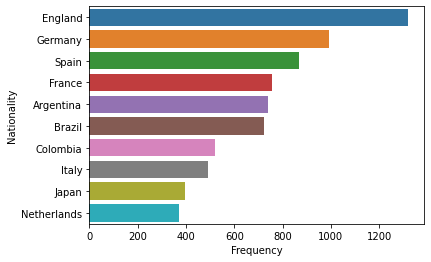

In [42]:
x=data['Nationality'].value_counts()
sns.barplot(y=x.index[0:10],x=x[0:10])
plt.ylabel("Nationality")
plt.xlabel("Frequency")

* In the dataset European country players are more.

In [22]:
print("Total number of clubs are:",data['Club'].nunique())

Total number of clubs are: 651


Text(0.5, 0, 'Frequency')

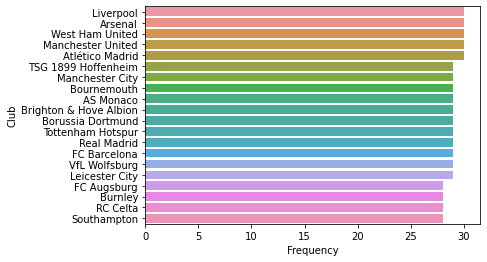

In [23]:
#Top 20 clubs with highest number of players
x=data['Club'].value_counts()
sns.barplot(y=x.index[0:20],x=x[0:20])
plt.ylabel("Club")
plt.xlabel("Frequency")

* 'West Ham United', 'Liverpool', 'Manchester United' & 'Arsenal' are the top clubs with highest number of players

Text(0, 0.5, 'Name')

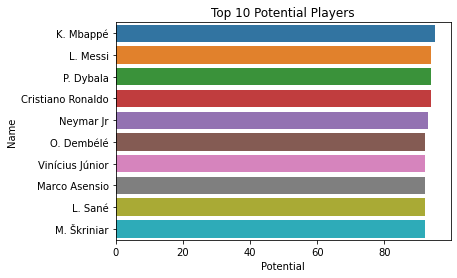

In [24]:
#maximum and minimum potential and  overall performanced players 
top_potential=data.sort_values(by='Potential',ascending=False).head(10)
sns.barplot(x=top_potential['Potential'],y=top_potential['Name'])
plt.title("Top 10 Potential Players")
plt.xlabel("Potential")
plt.ylabel("Name")

* K Mbappe and L Messi  are top players in terms of potential.

Text(0, 0.5, 'Name')

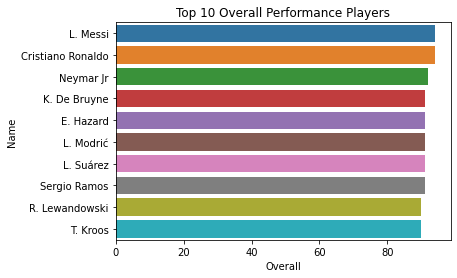

In [25]:
#Top overall performance players
top_overall=data.sort_values(by='Overall',ascending=False).head(10)
sns.barplot(x=top_overall['Overall'],y=top_overall['Name'])
plt.title("Top 10 Overall Performance Players")
plt.xlabel("Overall")
plt.ylabel("Name")

* L Messi, Cristiano Ronaldo & Neymar Jr are the top overll performers.

Text(0, 0.5, 'Name')

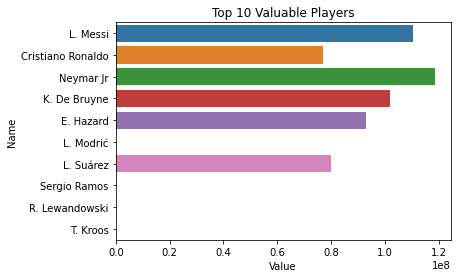

In [26]:
#Top Valuable Players
top_value=data.sort_values(by='Value',ascending=False).head(10)
sns.barplot(x=top_value['Value'],y=top_overall['Name'])
plt.title("Top 10 Valuable Players")
plt.xlabel("Value")
plt.ylabel("Name")

In [27]:
top_value

Name  Age Nationality  Overall  Potential  \
2           Neymar Jr   26      Brazil       92         93   
0            L. Messi   31   Argentina       94         94   
4        K. De Bruyne   27     Belgium       91         92   
5           E. Hazard   27     Belgium       91         91   
15          P. Dybala   24   Argentina       89         94   
16            H. Kane   24     England       89         91   
25          K. Mbappé   19      France       88         95   
7           L. Suárez   31     Uruguay       91         91   
17       A. Griezmann   27      France       89         90   
1   Cristiano Ronaldo   33    Portugal       94         94   

                   Club        Value      Wage  Special Preferred Foot  \
2   Paris Saint-Germain  118500000.0  290000.0     2143          Right   
0          FC Barcelona  110500000.0  565000.0     2202           Left   
4       Manchester City  102000000.0  355000.0     2281          Right   
5               Chelsea   93000000.0  340000.0     2142          Right   
15             Juventus   89000000.0  205000.0     2092           Left   
16    Tottenham Hotspur   83500000.0  205000.0     2165          Right   
25  Paris Saint-Germain   81000000.0  100000.0     2118          Right   
7          FC Barcelona   80000000.0  455000.0     2346          Right   
17      Atlético Madrid   78000000.0  145000.0     2246           Left   
1              Juventus   77000000.0  405000.0     2228          Right   

    International Reputation  Weak Foot  Skill Moves       Work Rate  \
2                        5.0        5.0          5.0    High/ Medium   
0                        5.0        4.0          4.0  Medium/ Medium   
4                        4.0        5.0          4.0      High/ High   
5                        4.0        4.0          4.0    High/ Medium   
15                       3.0        3.0          4.0    High/ Medium   
16                       3.0        4.0          3.0      High/ High   
25                       3.0        4.0          5.0    High/ Medium   
7                        5.0        4.0          3.0    High/ Medium   
17                       4.0        3.0          4.0      High/ High   
1                        5.0        4.0          5.0       High/ Low   

     Body Type Position  Jersey Number Joined Contract Valid Until    Height  \
2       Neymar       LW           10.0   2017                 2022  5.750000   
0        Messi       RF           10.0   2004                 2021  5.583333   
4       Normal      RCM            7.0   2015                 2023  5.916667   
5       Normal       LF           10.0   2012                 2020  5.666667   
15      Normal       LF           21.0   2015                 2022  5.833333   
16      Normal       ST            9.0   2010                 2024  6.166667   
25        Lean       RM           10.0   2018                 2022  5.833333   
7       Normal       RS            9.0   2014                 2021  6.000000   
17        Lean      CAM            7.0   2014                 2023  5.750000   
1   C. Ronaldo       ST            7.0   2018                 2022  6.166667   

    Weight    LS    ST    RS    LW    LF    CF    RF    RW   LAM   CAM   RAM  \
2    150.0  87.0  87.0  87.0  92.0  92.0  92.0  92.0  92.0  92.0  92.0  92.0   
0    159.0  90.0  90.0  90.0  94.0  95.0  95.0  95.0  94.0  95.0  95.0  95.0   
4    154.0  85.0  85.0  85.0  90.0  90.0  90.0  90.0  90.0  91.0  91.0  91.0   
5    163.0  86.0  86.0  86.0  92.0  91.0  91.0  91.0  92.0  92.0  92.0  92.0   
15   165.0  86.0  86.0  86.0  90.0  89.0  89.0  89.0  90.0  90.0  90.0  90.0   
16   196.0  89.0  89.0  89.0  85.0  87.0  87.0  87.0  85.0  85.0  85.0  85.0   
25   161.0  88.0  88.0  88.0  90.0  90.0  90.0  90.0  90.0  89.0  89.0  89.0   
7    190.0  92.0  92.0  92.0  91.0  92.0  92.0  92.0  91.0  90.0  90.0  90.0   
17   161.0  89.0  89.0  89.0  90.0  90.0  90.0  90.0  90.0  89.0  89.0  89.0   
1    183.0  94.0  94.0  94.0  92.0  93.0  93.

<AxesSubplot:xlabel='Value', ylabel='Name'>

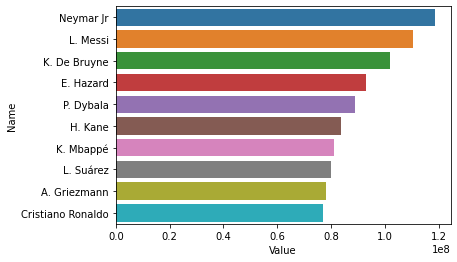

In [28]:
sns.barplot(x=top_value['Value'],y=top_value['Name'])

* Players like Neymar Jr and L Messi are most valuable players.

C:\Users\Rahul Gupta\anaconda3\envs\PyR\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Age', ylabel='count'>

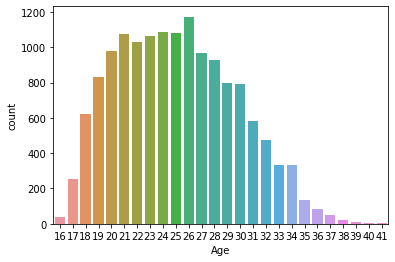

In [29]:
sns.countplot(data['Age'])

* There is large number of players in the age group 20 to 30.

Text(0.5, 1.0, 'Scatterplot of Potential v/s Overall Rating')

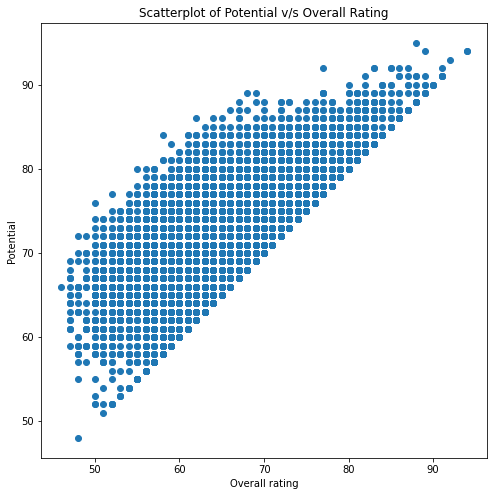

In [30]:
plt.figure(figsize=(8,8))
plt.scatter(x=data['Overall'],y=data['Potential'])
plt.xlabel("Overall rating")
plt.ylabel("Potential")
plt.title("Scatterplot of Potential v/s Overall Rating")

* As the potential of the player increases their overall rating also increases.

<AxesSubplot:xlabel='Overall', ylabel='Club'>

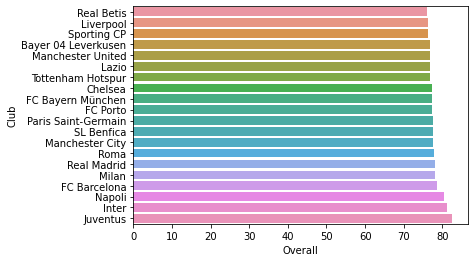

In [31]:
#Top 20 teams with highest player's average Overall rating
club = data.groupby('Club')['Overall'].mean().reset_index().sort_values('Overall', ascending=True).tail(20)
sns.barplot(x=club['Overall'],y=club['Club'])

* Clubs like 'Juventus', 'Inter' and 'Napoli' have players with highest average overall rating.

C:\Users\Rahul Gupta\anaconda3\envs\PyR\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Preferred Foot', ylabel='count'>

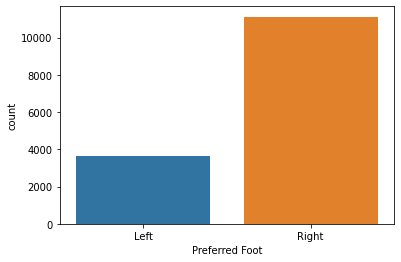

In [32]:
sns.countplot(data['Preferred Foot'])

* There are large number of players who prefer right foot.

Text(0.5, 1.0, 'Scatterplot of Value v/s Wage')

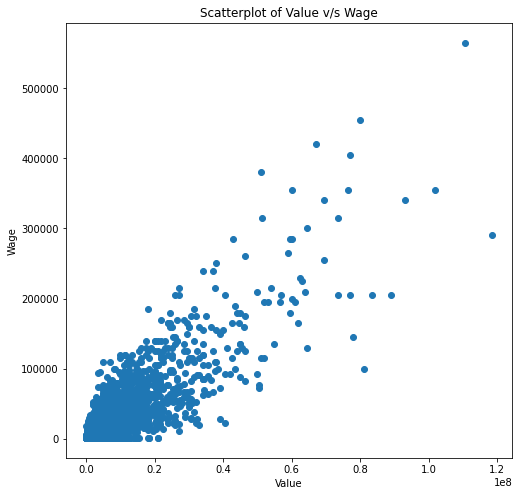

In [33]:
plt.figure(figsize=(8,8))
plt.scatter(x=data['Value'],y=data['Wage'])
plt.xlabel("Value")
plt.ylabel("Wage")
plt.title("Scatterplot of Value v/s Wage")

* There are large number of players with low value and also low wage. Overall as the value of a player increases his wage also increases.

C:\Users\Rahul Gupta\anaconda3\envs\PyR\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Position', ylabel='count'>

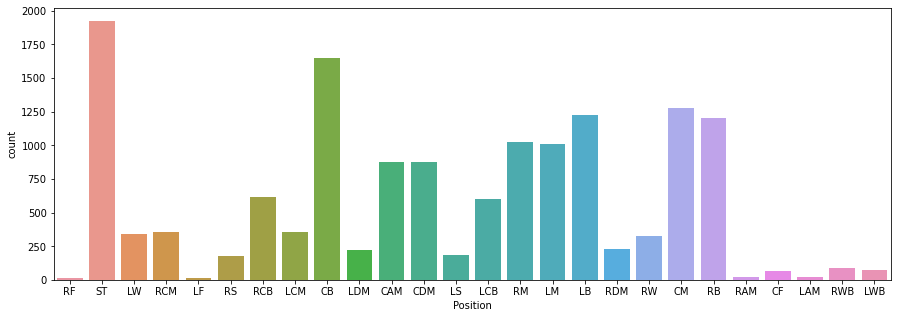

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(data['Position'])

* Frequency of strikers is highest in the given dataset.

C:\Users\Rahul Gupta\anaconda3\envs\PyR\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Value', ylabel='Density'>

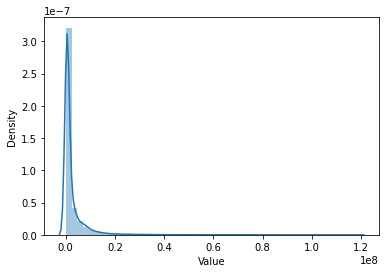

In [35]:
sns.distplot(data['Value'])

* The distribution of Value is highly skewed with very large number of players having low value.

C:\Users\Rahul Gupta\anaconda3\envs\PyR\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Wage', ylabel='Density'>

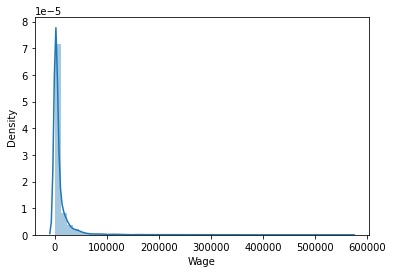

In [36]:
sns.distplot(data['Wage'])

* Distribution of Wage is highly skewed with very large number of players having low wage.

Text(0.5, 1.0, 'Top 20 tallest players')

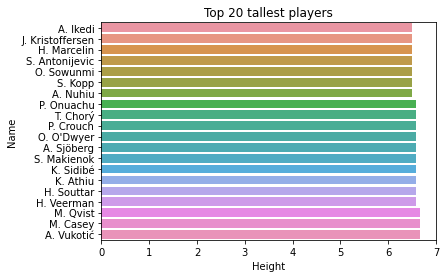

In [37]:
player = data.groupby('Name')['Height'].mean().reset_index().sort_values('Height', ascending=True).tail(20)
sns.barplot(x=player['Height'],y=player['Name'])
plt.title("Top 20 tallest players")

* Players like 'A Vukotic', 'M Casey' & 'M Qvist' are tallest.

Text(0.5, 1.0, 'Top 20 heaviest players')

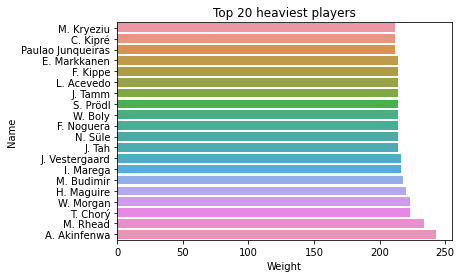

In [38]:
player = data.groupby('Name')['Weight'].mean().reset_index().sort_values('Weight', ascending=True).tail(20)
sns.barplot(x=player['Weight'],y=player['Name'])
plt.title("Top 20 heaviest players")

'A Akinfenwa' is the most heaviest player.

Text(0.5, 1.0, 'Top 20 players who are good in crossing')

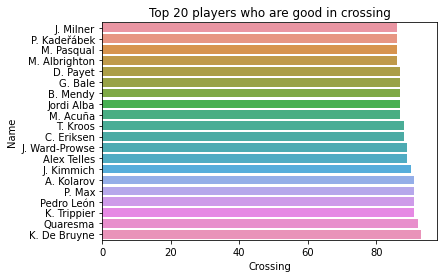

In [39]:
player = data.groupby('Name')['Crossing'].mean().reset_index().sort_values('Crossing', ascending=True).tail(20)
sns.barplot(x=player['Crossing'],y=player['Name'])
plt.title("Top 20 players who are good in crossing")

* 'K De Bruyne' is the best player among all who is good in crossing the ball.

In [40]:
player = data.groupby('Name')['Finishing'].mean().reset_index().sort_values('Finishing', ascending=True).tail(20)
sns.barplot(x=player['Finishing'],y=player['Name'])
plt.title("Top 20 players who are good in finishing the ball")

Text(0.5, 1.0, 'Top 20 players who are good in finishing the ball')

* 'L Messi' is the best player among all who finish the ball well.

In [41]:
player = data.groupby('Name')['HeadingAccuracy'].mean().reset_index().sort_values('HeadingAccuracy', ascending=True).tail(20)
sns.barplot(x=player['HeadingAccuracy'],y=player['Name'])
plt.title("Top 20 players who are good at heading the ball")

Text(0.5, 1.0, 'Top 20 players who are good at heading the ball')

* B. Dost's heading accuracy is best among all the players.

Text(0.5, 1.0, 'Top 20 players who are good at short passing')

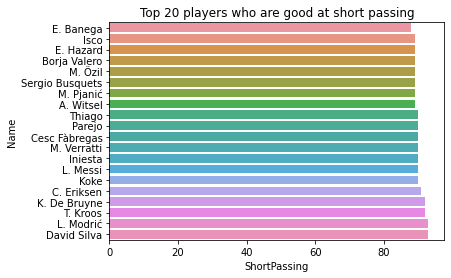

In [42]:
player= data.groupby('Name')['ShortPassing'].mean().reset_index().sort_values('ShortPassing', ascending=True).tail(20)
sns.barplot(x=player['ShortPassing'],y=player['Name'])
plt.title("Top 20 players who are good at short passing")

* David Silva is best among all in short passing

Text(0.5, 1.0, 'Top 20 players who are good at Volleys')

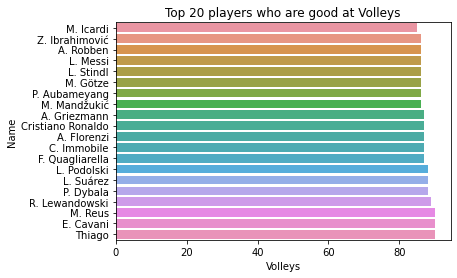

In [43]:
player= data.groupby('Name')['Volleys'].mean().reset_index().sort_values('Volleys', ascending=True).tail(20)
sns.barplot(x=player['Volleys'],y=player['Name'])
plt.title("Top 20 players who are good at Volleys")

* Thiago is best among all in volley.

In [44]:
player= data.groupby('Name')['Dribbling'].mean().reset_index().sort_values('Dribbling', ascending=True).tail(20)
sns.barplot(x=player['Dribbling'],y=player['Name'])
plt.title("Top 20 players who are good at Dribbling")

Text(0.5, 1.0, 'Top 20 players who are good at Dribbling')

* L Messi is best among all players in dribbling the ball.

In [45]:
player= data.groupby('Name')['Curve'].mean().reset_index().sort_values('Curve', ascending=True).tail(20)
sns.barplot(x=player['Curve'],y=player['Name'])
plt.title("Top 20 players who are good at curving the ball")

Text(0.5, 1.0, 'Top 20 players who are good at curving the ball')

* 'Quaresma' is best among all in curving the ball.

In [46]:
player= data.groupby('Name')['LongPassing'].mean().reset_index().sort_values('LongPassing', ascending=True).tail(20)
sns.barplot(x=player['LongPassing'],y=player['Name'])
plt.title("Top 20 players who are good at long pass")

Text(0.5, 1.0, 'Top 20 players who are good at long pass')

* T Kroos is best among all in long pass.

Text(0.5, 1.0, 'Top 20 players who are good at ball control')

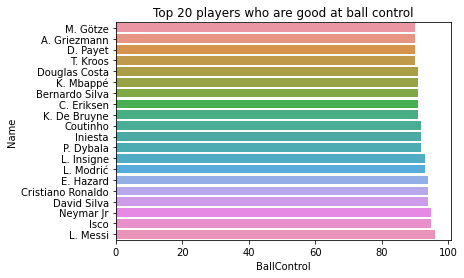

In [47]:
player= data.groupby('Name')['BallControl'].mean().reset_index().sort_values('BallControl', ascending=True).tail(20)
sns.barplot(x=player['BallControl'],y=player['Name'])
plt.title("Top 20 players who are good at ball control")

* L Messi is best among all in controlling the ball.

Text(0.5, 1.0, 'Top 20 players who are good at accelerating the ball')

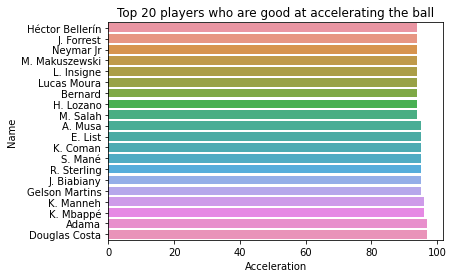

In [48]:
player= data.groupby('Name')['Acceleration'].mean().reset_index().sort_values('Acceleration', ascending=True).tail(20)
sns.barplot(x=player['Acceleration'],y=player['Name'])
plt.title("Top 20 players who are good at accelerating the ball")

* 'Douglas Costa is the best among all in accelerating the ball.

Text(0.5, 1.0, 'Top 20 players who are good at sprinting')

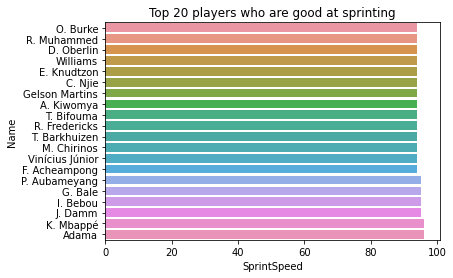

In [49]:
player= data.groupby('Name')['SprintSpeed'].mean().reset_index().sort_values('SprintSpeed', ascending=True).tail(20)
sns.barplot(x=player['SprintSpeed'],y=player['Name'])
plt.title("Top 20 players who are good at sprinting")

* Adama has best sprint speed among all players.

Text(0.5, 1.0, 'Top 20 players agile players')

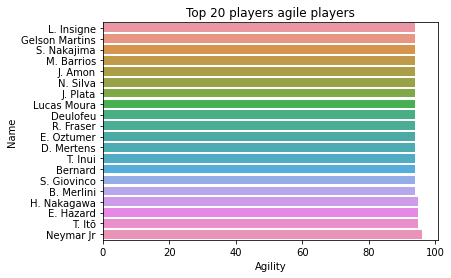

In [50]:
player= data.groupby('Name')['Agility'].mean().reset_index().sort_values('Agility', ascending=True).tail(20)
sns.barplot(x=player['Agility'],y=player['Name'])
plt.title("Top 20 players agile players")

* Neymar Jr is the most agile player among all.

Text(0.5, 1.0, 'Top 20 players who is best in reaction')

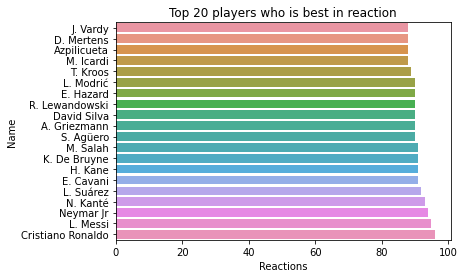

In [51]:
player= data.groupby('Name')['Reactions'].mean().reset_index().sort_values('Reactions', ascending=True).tail(20)
sns.barplot(x=player['Reactions'],y=player['Name'])
plt.title("Top 20 players who is best in reaction")

Cristiano Ronaldo has best reaction among all.

Text(0.5, 1.0, 'Top 20 players who is best in reaction')

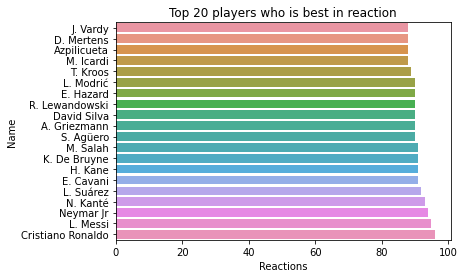

In [52]:
player= data.groupby('Name')['Reactions'].mean().reset_index().sort_values('Reactions', ascending=True).tail(20)
sns.barplot(x=player['Reactions'],y=player['Name'])
plt.title("Top 20 players who is best in reaction")

In [53]:
player= data.groupby('Name')['Balance'].mean().reset_index().sort_values('Balance', ascending=True).tail(20)
sns.barplot(x=player['Balance'],y=player['Name'])
plt.title("Top 20 players with best balance")

Text(0.5, 1.0, 'Top 20 players with best balance')

* Players like 'T Ito', 'T Mizutani', 'R Fraser', 'E Oztumer' & 'Bernard' have best balance among all.

In [54]:
player= data.groupby('Name')['ShotPower'].mean().reset_index().sort_values('ShotPower', ascending=True).tail(20)
sns.barplot(x=player['ShotPower'],y=player['Name'])
plt.title("Top 20 players with best shot power")

Text(0.5, 1.0, 'Top 20 players with best shot power')

* Cristiano Ronaldo have best short power among all.

Text(0.5, 1.0, 'Top 20 players who are best jumpers')

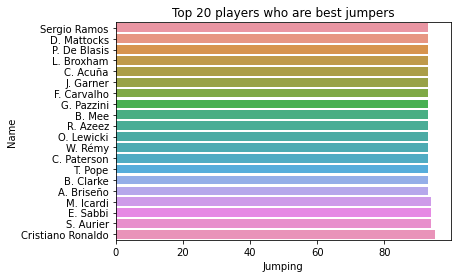

In [55]:
player= data.groupby('Name')['Jumping'].mean().reset_index().sort_values('Jumping', ascending=True).tail(20)
sns.barplot(x=player['Jumping'],y=player['Name'])
plt.title("Top 20 players who are best jumpers")

* Cristiano Ronaldo is best among all in jumping.

In [56]:
player= data.groupby('Name')['Stamina'].mean().reset_index().sort_values('Stamina', ascending=True).tail(20)
sns.barplot(x=player['Stamina'],y=player['Name'])
plt.title("Top 20 players having high stamina")

Text(0.5, 1.0, 'Top 20 players having high stamina')

* N Kante have highest stamina among all.

Text(0.5, 1.0, 'Top 20 players with high strength')

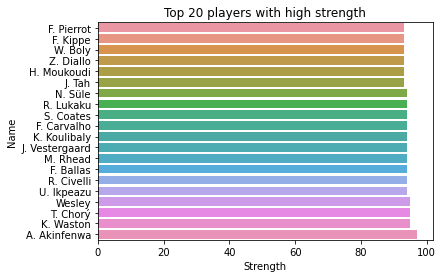

In [57]:
player= data.groupby('Name')['Strength'].mean().reset_index().sort_values('Strength', ascending=True).tail(20)
sns.barplot(x=player['Strength'],y=player['Name'])
plt.title("Top 20 players with high strength")

* A Akinfenwa is having the highest strength among all.

Text(0.5, 1.0, 'Top 20 players who are good at long shot')

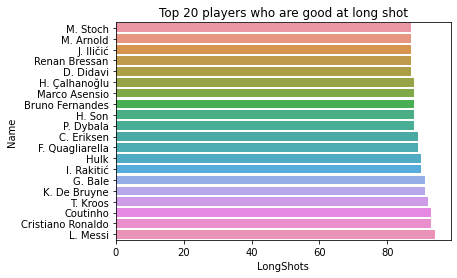

In [58]:
player= data.groupby('Name')['LongShots'].mean().reset_index().sort_values('LongShots', ascending=True).tail(20)
sns.barplot(x=player['LongShots'],y=player['Name'])
plt.title("Top 20 players who are good at long shot")

* L Messi is best among all in long shot.

Text(0.5, 1.0, 'Top 20 most aggressive players')

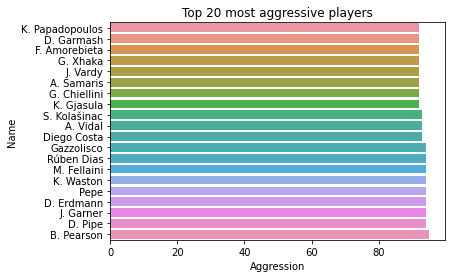

In [59]:
player= data.groupby('Name')['Aggression'].mean().reset_index().sort_values('Aggression', ascending=True).tail(20)
sns.barplot(x=player['Aggression'],y=player['Name'])
plt.title("Top 20 most aggressive players")

* B Pearson is the most aggressive player.

Text(0.5, 1.0, 'Top 20 players with penalties')

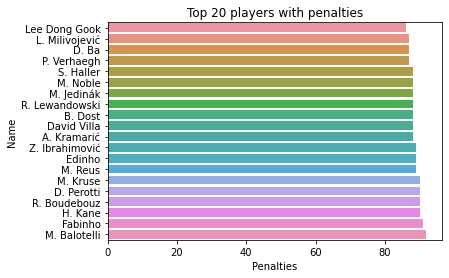

In [60]:
player= data.groupby('Name')['Penalties'].mean().reset_index().sort_values('Penalties', ascending=True).tail(20)
sns.barplot(x=player['Penalties'],y=player['Name'])
plt.title("Top 20 players with penalties")

* M Balotelli tops the list with maximum penalties.

Text(0.5, 1.0, 'Top 20 players with best sliding tackle')

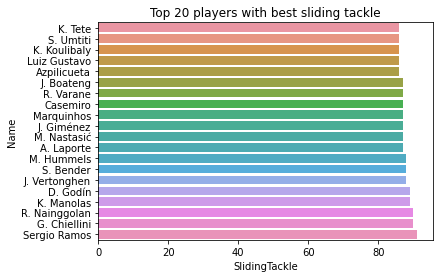

In [61]:
player= data.groupby('Name')['SlidingTackle'].mean().reset_index().sort_values('SlidingTackle', ascending=True).tail(20)
sns.barplot(x=player['SlidingTackle'],y=player['Name'])
plt.title("Top 20 players with best sliding tackle")

* Sergio Ramos is best among all in slide tackling.

Text(0.5, 1.0, 'Top 20 players with best GKPositioning')

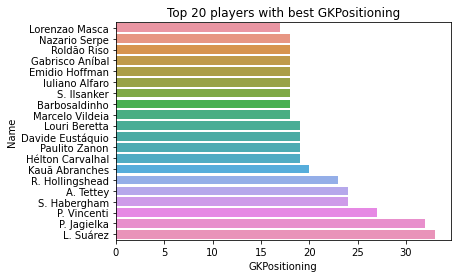

In [62]:
player= data.groupby('Name')['GKPositioning'].mean().reset_index().sort_values('GKPositioning', ascending=True).tail(20)
sns.barplot(x=player['GKPositioning'],y=player['Name'])
plt.title("Top 20 players with best GKPositioning")

* L Suarez is best among all in GKPositioning.

Text(0.5, 1.0, 'Scatterplot of Age v/s Overall')

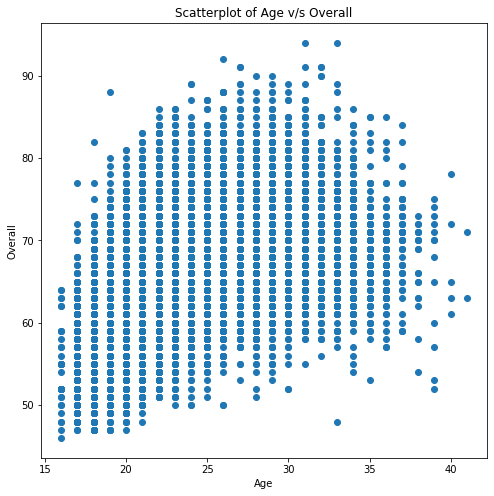

In [63]:
plt.figure(figsize=(8,8))
plt.scatter(x=data['Age'],y=data['Overall'])
plt.xlabel("Age")
plt.ylabel("Overall")
plt.title("Scatterplot of Age v/s Overall")

* As the age of a player increases the overall performance of the player increases gradually.

Text(0.5, 1.0, 'Scatterplot of Age v/s value')

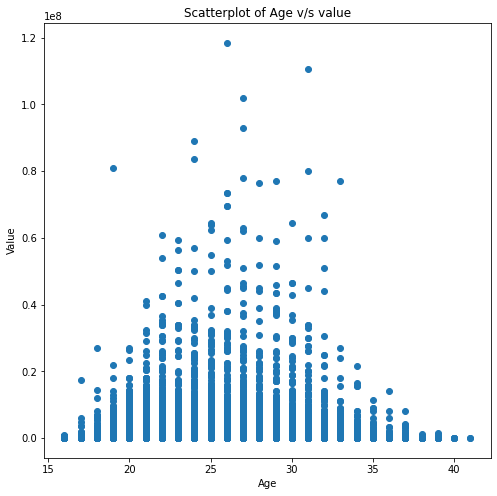

In [64]:
plt.figure(figsize=(8,8))
plt.scatter(x=data['Age'],y=data['Value'])
plt.xlabel("Age")
plt.ylabel("Value")
plt.title("Scatterplot of Age v/s value")

* Players in the middle age group from 24 years to 32 years have high value.

Text(0.5, 1.0, 'Scatterplot of Age v/s Crossing ')

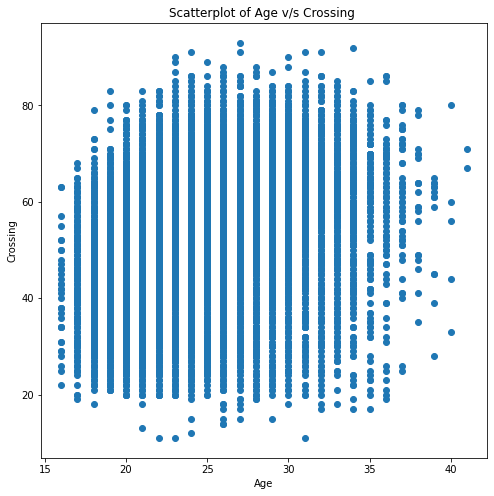

In [65]:
plt.figure(figsize=(8,8))
plt.scatter(x=data['Age'],y=data['Crossing'])
plt.xlabel("Age")
plt.ylabel("Crossing")
plt.title("Scatterplot of Age v/s Crossing ")

* There is no as such any relation between age and crossing skill of a player.

Text(0.5, 1.0, 'Scatterplot of Age v/s Acceleration')

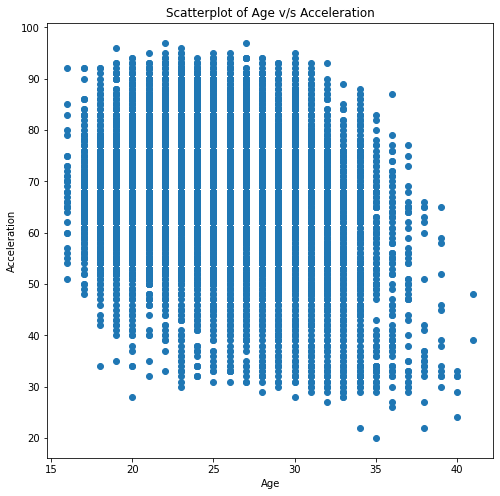

In [66]:
plt.figure(figsize=(8,8))
plt.scatter(x=data['Age'],y=data['Acceleration'])
plt.xlabel("Age")
plt.ylabel("Acceleration")
plt.title("Scatterplot of Age v/s Acceleration")

* Players in the age group 15 years to 35 years have high acceleration and then it gradually decreases as the age increases.

Text(0.5, 1.0, 'Scatterplot of Age v/s ShortPassing')

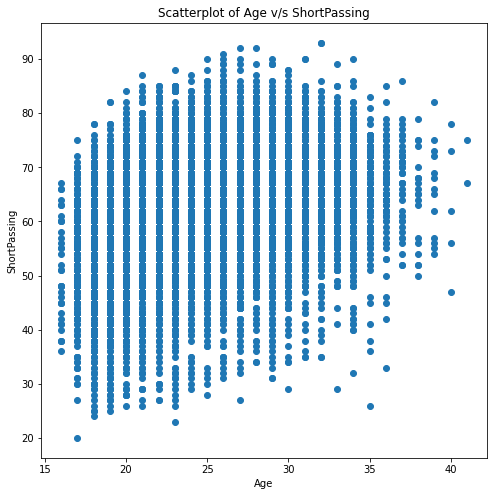

In [67]:
plt.figure(figsize=(8,8))
plt.scatter(x=data['Age'],y=data['ShortPassing'])
plt.xlabel("Age")
plt.ylabel("ShortPassing")
plt.title("Scatterplot of Age v/s ShortPassing")

* As the age of a player increases his short passing skills also improve.

Text(0.5, 1.0, 'Scatterplot of Age v/s Reactions')

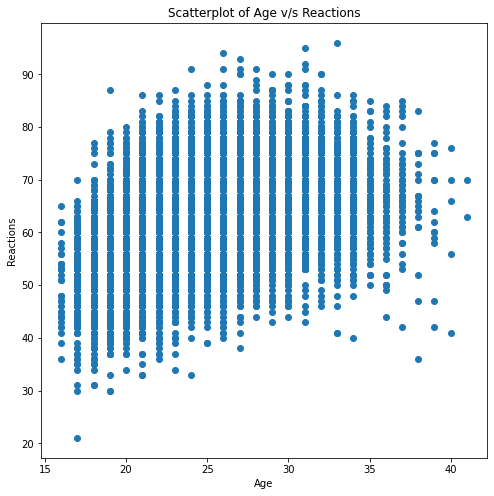

In [68]:
plt.figure(figsize=(8,8))
plt.scatter(x=data['Age'],y=data['Reactions'])
plt.xlabel("Age")
plt.ylabel("Reactions")
plt.title("Scatterplot of Age v/s Reactions")

* As the age increases the reaction of the players also increases.

Text(0.5, 1.0, 'Scatterplot of Dribbling v/s BallControl')

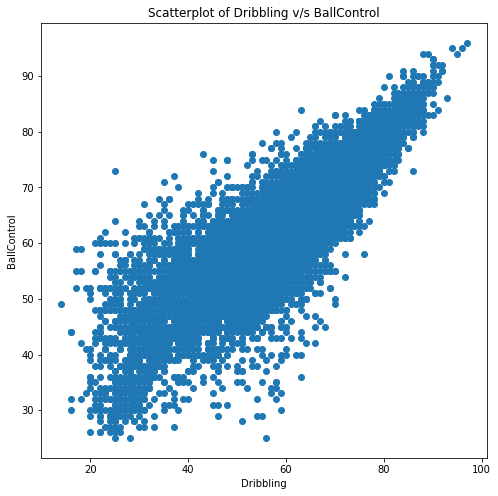

In [69]:
plt.figure(figsize=(8,8))
plt.scatter(x=data['Dribbling'],y=data['BallControl'])
plt.xlabel("Dribbling")
plt.ylabel("BallControl")
plt.title("Scatterplot of Dribbling v/s BallControl")

* There is strong positive correlation between Dribbling and ball control.

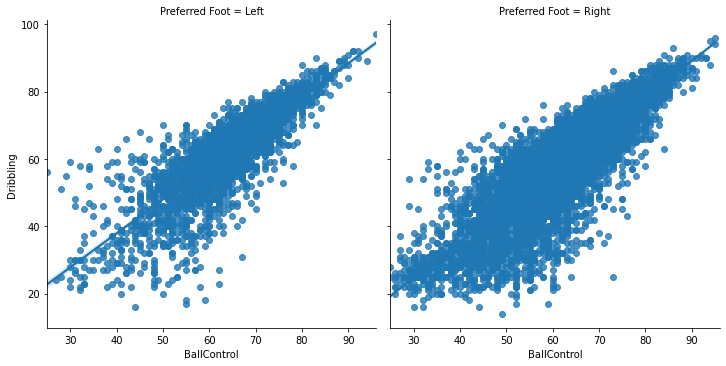

In [70]:
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = data,col = 'Preferred Foot')

 * Regardless of foot preference, as the ball control increases, dribbling also increases.

In [43]:
fig = px.pie(data, names = "Work Rate",
             title = "<b>Counts in Work Rate</b>",
             hole = 0.4, template = "plotly_dark",
            width=600,
            height=500)
fig.show()

* Players with medium work rate is highest in the data set.

# Outlier Detection

In [72]:
sns.boxplot(data['Age'])
plt.title("Boxplot of Age")

C:\Users\Rahul Gupta\anaconda3\envs\PyR\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Boxplot of Age')

* There are three outliers in 'Age' column

C:\Users\Rahul Gupta\anaconda3\envs\PyR\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Boxplot of Overall')

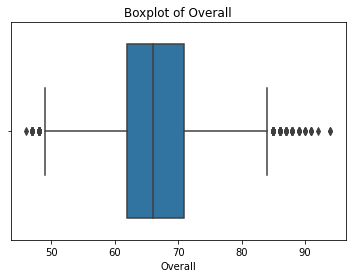

In [73]:
sns.boxplot(data['Overall'])
plt.title("Boxplot of Overall")

* There are outliers in 'Overall'

C:\Users\Rahul Gupta\anaconda3\envs\PyR\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Boxplot of Potential')

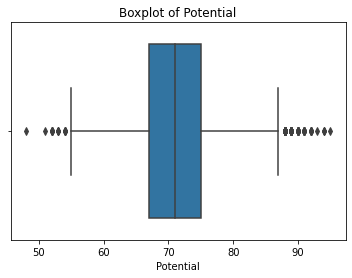

In [74]:
sns.boxplot(data['Potential'])
plt.title("Boxplot of Potential")

* There are outliers in 'Potential' columns

C:\Users\Rahul Gupta\anaconda3\envs\PyR\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Boxplot of Value')

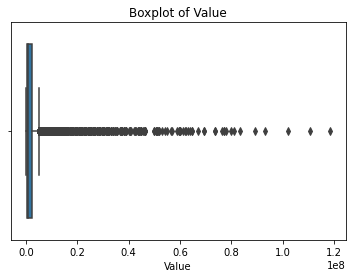

In [75]:
sns.boxplot(data['Value'])
plt.title("Boxplot of Value")

* There are large number of outliers in 'Value'

C:\Users\Rahul Gupta\anaconda3\envs\PyR\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Boxplot of Wage')

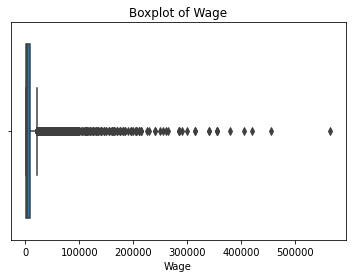

In [76]:
sns.boxplot(data['Wage'])
plt.title('Boxplot of Wage')

* There are large number of outliers in 'Wage'

In [77]:
sns.boxplot(data['Special'])
plt.title('Boxplot of Special')

C:\Users\Rahul Gupta\anaconda3\envs\PyR\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Boxplot of Special')

* There are outliers in 'Special'

In [78]:
sns.boxplot(data['International Reputation'])
plt.title('Boxplot of "International Reputation"')

C:\Users\Rahul Gupta\anaconda3\envs\PyR\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Boxplot of "International Reputation"')

* There are outliers that highly affects the underlying distribution

C:\Users\Rahul Gupta\anaconda3\envs\PyR\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, "Boxplot of 'Weak Foot'")

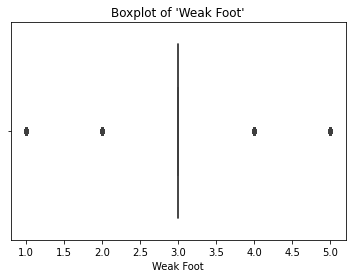

In [79]:
sns.boxplot(data['Weak Foot'])
plt.title("Boxplot of 'Weak Foot'")

* There are four outliers which highly affects the underlying distribution.

C:\Users\Rahul Gupta\anaconda3\envs\PyR\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, "Bixplot of 'Skill Moves'")

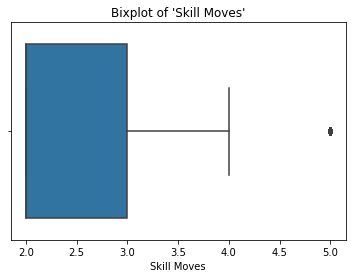

In [80]:
sns.boxplot(data['Skill Moves'])
plt.title("Bixplot of 'Skill Moves'")

There is only one outlier in 'Skill Moves'.

C:\Users\Rahul Gupta\anaconda3\envs\PyR\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, "Boxplot of 'Height'")

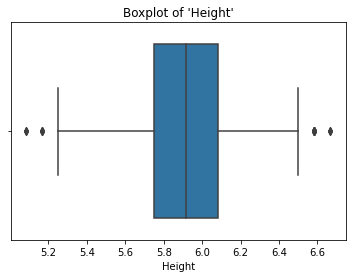

In [81]:
sns.boxplot(data['Height'])
plt.title("Boxplot of 'Height'")

* There are four outliers in 'Height' column.

C:\Users\Rahul Gupta\anaconda3\envs\PyR\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, "Boxplot of 'Weight'")

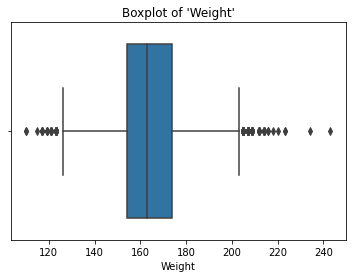

In [82]:
sns.boxplot(data['Weight'])
plt.title("Boxplot of 'Weight'")

* There are large number of outliers in Weight.

In [44]:
numerical_col=data.select_dtypes(include=['int64','float64']).columns

In [45]:
#Lower and Upper fence of Outliers Identification
def lower_limit(x):
    return np.quantile(x,0.25)-1.5*(np.quantile(x,0.75)-np.quantile(x,0.25))

def upper_limit(x):
    return np.quantile(x,0.25)+1.5*(np.quantile(x,0.75)-np.quantile(x,0.25))

In [46]:
# Getting rid of non-integer features.
data2 = data.drop(columns=[ 'Name', 'Nationality', 'Club','Value','Wage','Preferred Foot','Work Rate','Body Type','Position', 'Joined','Contract Valid Until','Height','Weight','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB'],axis=1)
X = data2.values
X = StandardScaler().fit_transform(X)
print(X)

[[ 1.27604112  4.00853692  3.71546904 ...  1.41220981  1.12857961
  -0.80764857]
 [ 1.7102333   4.00853692  3.71546904 ...  1.41220981  1.12857961
   0.1591048 ]
 [ 0.19056065  3.71825816  3.55156207 ...  1.41220981  1.45376768
   0.1591048 ]
 ...
 [-1.98040027 -2.81301389 -0.71001907 ... -0.17812724 -1.47292492
   0.80360705]
 [-1.76330418 -2.81301389 -0.87392604 ...  1.0941424  -0.82254879
  -0.48539744]
 [-1.98040027 -2.95815327 -0.87392604 ... -0.49619465  0.47820348
  -0.48539744]]


# K-Means Clustering

In [53]:
wcss=[]
score=[]
for i in (3,5,7):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    cluster_labels = kmeans.fit_predict(X)
    score.append(metrics.silhouette_score(X, cluster_labels))
    wcss.append(kmeans.inertia_)

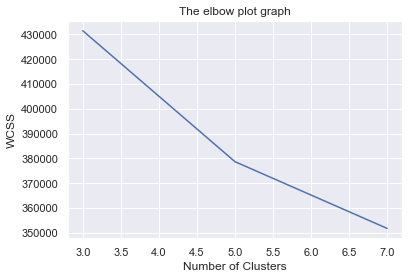

In [56]:
sns.set()
plt.plot([3,5,7],wcss)
plt.title("The elbow plot graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

* The appropriate value of k is 7

In [55]:
sns.barplot(x=[3,5,7],y=score)
plt.title("Barplot Representing Silhouette Score of Different k Values")
plt.xlabel("k")
plt.ylabel("Silhouette Score")

Text(0, 0.5, 'Silhouette Score')

* Appropriate number of clusters is 3.

In [57]:
kmeans1=KMeans(n_clusters=7,init='k-means++',random_state=0)
Y=kmeans1.fit_predict(X)
print(Y)

[6 6 6 ... 0 0 3]


In [58]:
kmeans2=KMeans(n_clusters=3,init='k-means++',random_state=0)
Y=kmeans2.fit_predict(X)
print(Y)

[0 0 0 ... 1 1 2]


# Agglomerative clustering

In [47]:
#Reducing the dimensionality of the Data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

In [101]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

* Thus, with the help of dendrogram, it is concluded that the optimal number of clusters for the given data and clustering technique is 3.

In [92]:
#k=2
ac2 = AgglomerativeClustering(n_clusters = 2)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()

In [93]:
#k=3
ac3 = AgglomerativeClustering(n_clusters = 3)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()

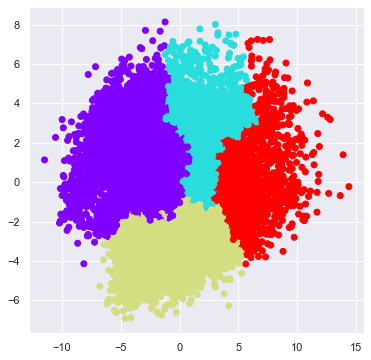

In [95]:
#k=4
ac4 = AgglomerativeClustering(n_clusters = 4)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.show()

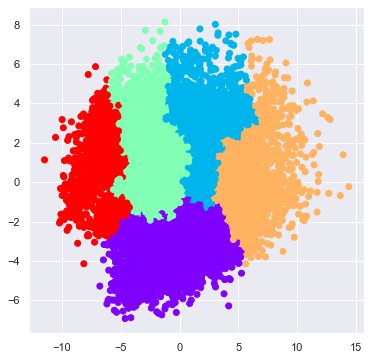

In [96]:
#k=5
ac5 = AgglomerativeClustering(n_clusters = 5)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.show()

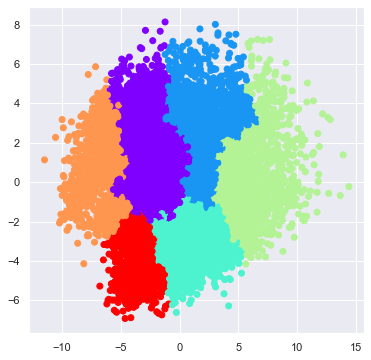

In [97]:
#k=6
ac6 = AgglomerativeClustering(n_clusters = 6)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.show()

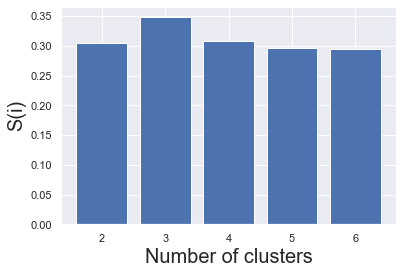

In [99]:
k = [2, 3, 4, 5, 6]
from sklearn.metrics import silhouette_score  
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac6.fit_predict(X_principal)))
  
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

* Thus, with the help of the silhouette scores, it is concluded that the optimal number of clusters for the given data and clustering technique is 3.

# DBScan

In [48]:
from sklearn.cluster import DBSCAN

In [51]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X_principal)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 8
Silhouette Coefficient: -0.099
